<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/R_SVM_DenseNet_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'
valid_dir = '/content/drive/MyDrive/A/Valid'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [11]:
# Load VGG16 model for feature extraction
model = DenseNet121(weights='imagenet', include_top=False)

In [12]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [13]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)


1/1 [==============================] - 0s 297ms/step


In [14]:
# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)



1/1 [==============================] - 0s 178ms/step


Training SVM with linear kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        60
           1       0.53      0.60      0.56        60
           2       0.51      0.48      0.50        60
           3       0.93      0.90      0.92        60
           4       0.81      0.80      0.81        60

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

Accuracy: 0.69
Sensitivity: 0.6900000000000001
Precision: 0.6944865343473512
F1 Score: 0.6916339047570353



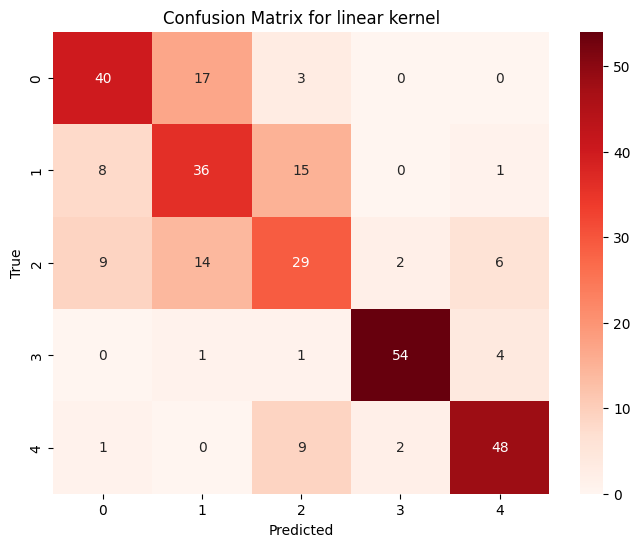

Training SVM with poly kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.67        60
           1       0.51      0.78      0.62        60
           2       0.45      0.33      0.38        60
           3       0.87      0.88      0.88        60
           4       0.82      0.77      0.79        60

    accuracy                           0.67       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.68      0.67      0.67       300

Accuracy: 0.6733333333333333
Sensitivity: 0.6733333333333332
Precision: 0.6843306994032643
F1 Score: 0.6690140279271495



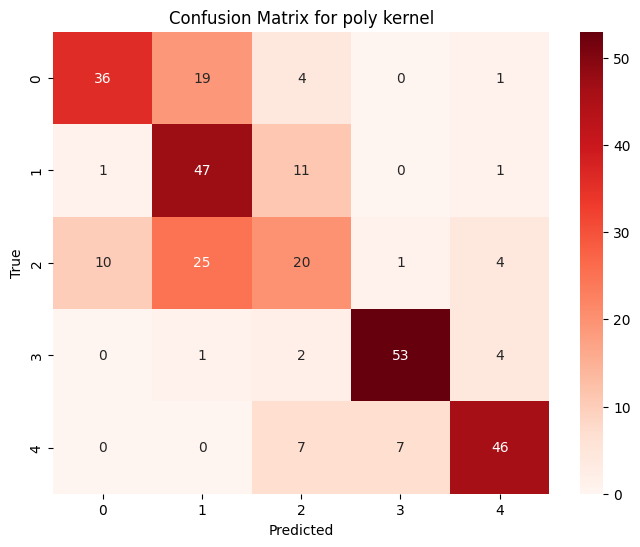

Training SVM with rbf kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63        60
           1       0.48      0.80      0.60        60
           2       0.45      0.30      0.36        60
           3       0.85      0.88      0.87        60
           4       0.77      0.73      0.75        60

    accuracy                           0.65       300
   macro avg       0.66      0.65      0.64       300
weighted avg       0.66      0.65      0.64       300

Accuracy: 0.65
Sensitivity: 0.65
Precision: 0.664704356198414
F1 Score: 0.6424427552901926



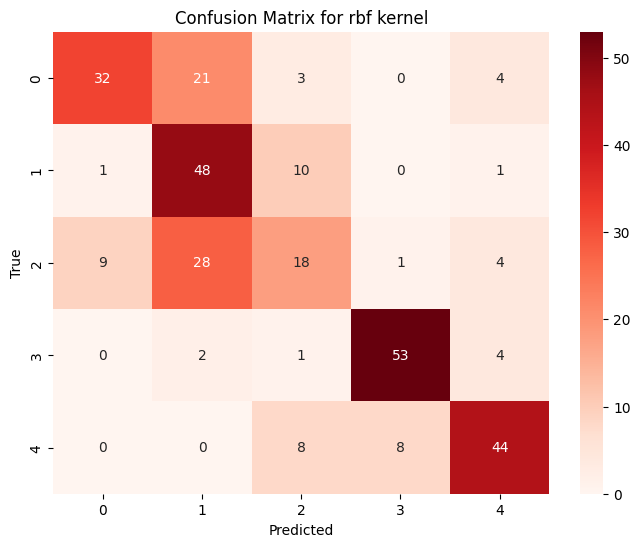

Training SVM with sigmoid kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        60
           1       0.44      0.87      0.59        60
           2       0.41      0.12      0.18        60
           3       0.80      0.88      0.84        60
           4       0.84      0.70      0.76        60

    accuracy                           0.63       300
   macro avg       0.64      0.63      0.60       300
weighted avg       0.64      0.63      0.60       300

Accuracy: 0.63
Sensitivity: 0.6300000000000001
Precision: 0.63984789067142
F1 Score: 0.60213172891139



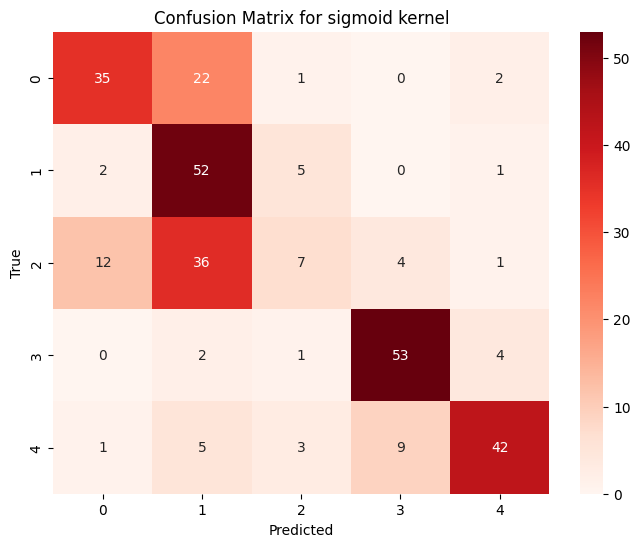

Training SVM with polynomial_exponential kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        60
           1       0.53      0.60      0.56        60
           2       0.51      0.48      0.50        60
           3       0.93      0.90      0.92        60
           4       0.81      0.80      0.81        60

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

Accuracy: 0.69
Sensitivity: 0.6900000000000001
Precision: 0.6944865343473512
F1 Score: 0.6916339047570353



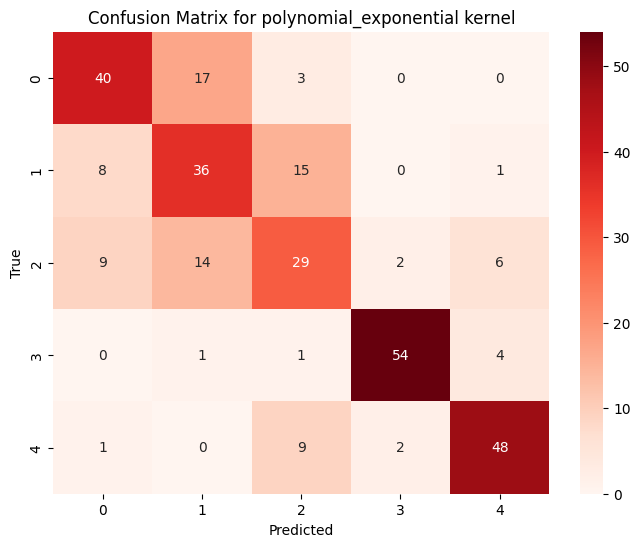

In [17]:
import matplotlib.pyplot as plt
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    import seaborn as sns

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()

Training SVM with linear kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        60
           1       0.53      0.60      0.56        60
           2       0.51      0.48      0.50        60
           3       0.93      0.90      0.92        60
           4       0.81      0.80      0.81        60

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

Accuracy: 0.69
Sensitivity: 0.6900000000000001
Precision: 0.6944865343473512
F1 Score: 0.6916339047570353



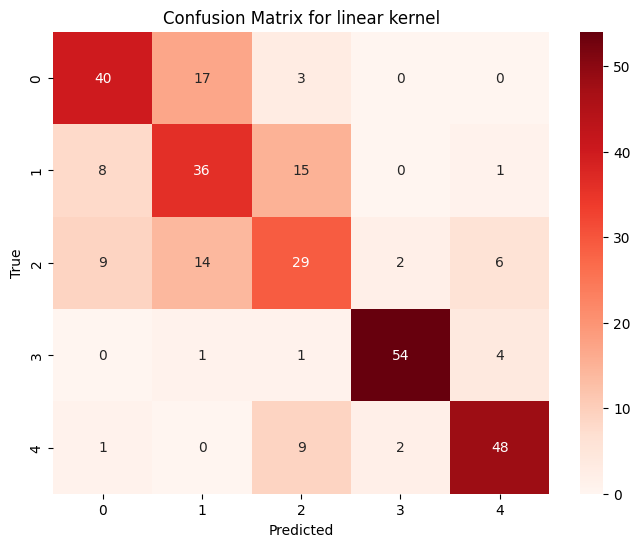

Training SVM with poly kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.60      0.67        60
           1       0.51      0.78      0.62        60
           2       0.45      0.33      0.38        60
           3       0.87      0.88      0.88        60
           4       0.82      0.77      0.79        60

    accuracy                           0.67       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.68      0.67      0.67       300

Accuracy: 0.6733333333333333
Sensitivity: 0.6733333333333332
Precision: 0.6843306994032643
F1 Score: 0.6690140279271495



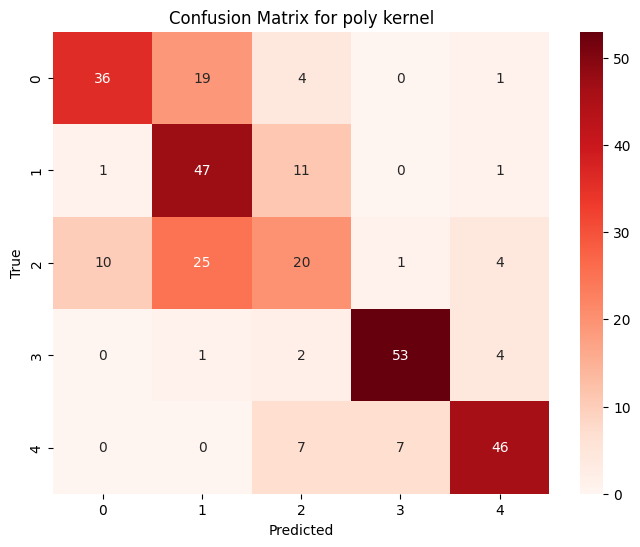

Training SVM with rbf kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63        60
           1       0.48      0.80      0.60        60
           2       0.45      0.30      0.36        60
           3       0.85      0.88      0.87        60
           4       0.77      0.73      0.75        60

    accuracy                           0.65       300
   macro avg       0.66      0.65      0.64       300
weighted avg       0.66      0.65      0.64       300

Accuracy: 0.65
Sensitivity: 0.65
Precision: 0.664704356198414
F1 Score: 0.6424427552901926



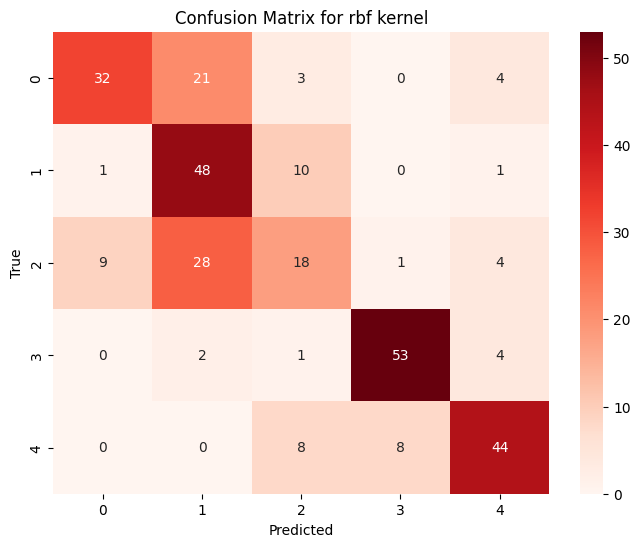

Training SVM with sigmoid kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        60
           1       0.44      0.87      0.59        60
           2       0.41      0.12      0.18        60
           3       0.80      0.88      0.84        60
           4       0.84      0.70      0.76        60

    accuracy                           0.63       300
   macro avg       0.64      0.63      0.60       300
weighted avg       0.64      0.63      0.60       300

Accuracy: 0.63
Sensitivity: 0.6300000000000001
Precision: 0.63984789067142
F1 Score: 0.60213172891139



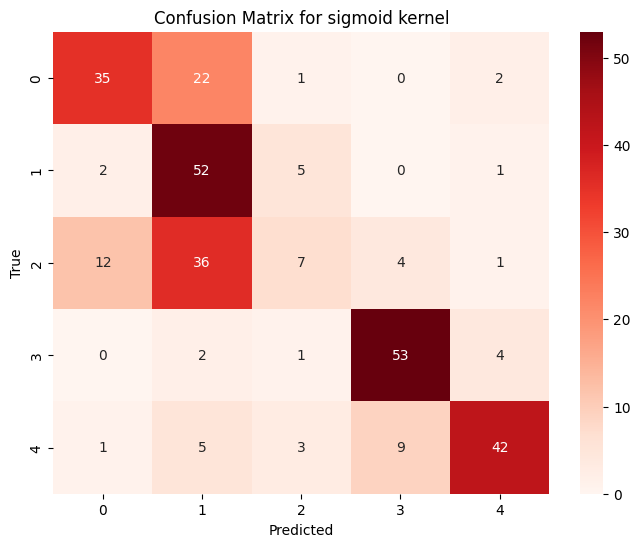

Training SVM with polynomial_exponential kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        60
           1       0.53      0.60      0.56        60
           2       0.51      0.48      0.50        60
           3       0.93      0.90      0.92        60
           4       0.81      0.80      0.81        60

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

Accuracy: 0.69
Sensitivity: 0.6900000000000001
Precision: 0.6944865343473512
F1 Score: 0.6916339047570353



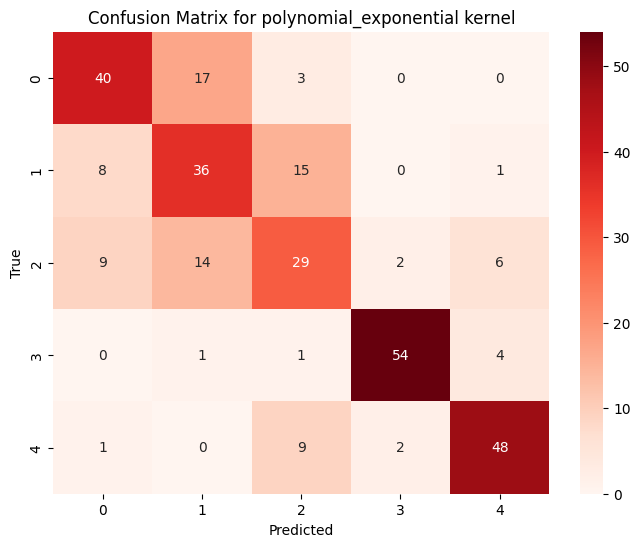

In [18]:
import matplotlib.pyplot as plt
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    import seaborn as sns

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()